In [1]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated

In [4]:
equifax_baseline_data = ingest_experiment_results(path.join('data', 'EquifaxBaseline_v2'))
equifax_greedy_baseline = ingest_experiment_results(path.join('data', 'Equifax_Greedy/Greedy_baseline'))
equifax_random_baseline = ingest_experiment_results(path.join('data', 'Equifax_Random/Random_baseline'))

simple_deception = ingest_experiment_results(path.join('data', 'Equifax_StaticRandomDefender'))

# Decoy 1
d1_honeycred_0 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_0'))
d1_honeycred_1 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_1'))
d1_honeycred_5 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_5'))
d1_honeycred_10 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_10'))

# Decoy 2
d2_honeycred_0 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_2', 'Equifax_honeycred_0'))
d2_honeycred_1 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_2', 'Equifax_honeycred_1'))
d2_honeycred_5 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_2', 'Equifax_honeycred_5'))
d2_honeycred_10 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_2', 'Equifax_honeycred_10'))

In [5]:
baseline_exfiltration_times = get_data_exfiltration_times(equifax_baseline_data)
greedy_baseline_exfiltration_times = get_data_exfiltration_times(equifax_greedy_baseline)
random_baseline_exfiltration_times = get_data_exfiltration_times(equifax_random_baseline)
simple_deception_exfiltration_times = get_data_exfiltration_times(simple_deception)

# Decoy 1
d1_honeycred_0_times = get_data_exfiltration_times(d1_honeycred_0)
d1_honeycred_1_times = get_data_exfiltration_times(d1_honeycred_1)
d1_honeycred_5_times = get_data_exfiltration_times(d1_honeycred_5)
d1_honeycred_10_times = get_data_exfiltration_times(d1_honeycred_10)

# Decoy 2
d2_honeycred_0_times = get_data_exfiltration_times(d2_honeycred_0)
d2_honeycred_1_times = get_data_exfiltration_times(d2_honeycred_1)
d2_honeycred_5_times = get_data_exfiltration_times(d2_honeycred_5)
d2_honeycred_10_times = get_data_exfiltration_times(d2_honeycred_10)

In [9]:
# Percent of experiments all data exfiltrated
baseline_exfiltration_percent = percent_of_data_exfiltrated(equifax_baseline_data)
equifax_greedy_percent = percent_of_data_exfiltrated(equifax_greedy_baseline)
equifax_random_percent = percent_of_data_exfiltrated(equifax_random_baseline)

simple_deception_exfiltration_percent = percent_of_data_exfiltrated(simple_deception)

honeycred_1_exfiltration_percent = percent_of_data_exfiltrated(d1_honeycred_1)
honeycred_5_exfiltration_percent = percent_of_data_exfiltrated(d1_honeycred_5)
honeycred_10_exfiltration_percent = percent_of_data_exfiltrated(d1_honeycred_10)

print(f'Baseline: {baseline_exfiltration_percent}')
print(f'Greedy: {equifax_greedy_percent}')
print(f'Random: {equifax_random_percent}')
print(f'Simple Deception: {simple_deception_exfiltration_percent}')
print(f'HoneyCred 1 Deception: {honeycred_1_exfiltration_percent}')
print(f'HoneyCred 5 Deception: {honeycred_5_exfiltration_percent}')
print(f'HoneyCred 10 Deception: {honeycred_10_exfiltration_percent}')

Baseline: 100.0
Greedy: 100.0
Random: 20.0
Simple Deception: 100.0
HoneyCred 1 Deception: 100.0
HoneyCred 5 Deception: 100.0
HoneyCred 10 Deception: 100.0


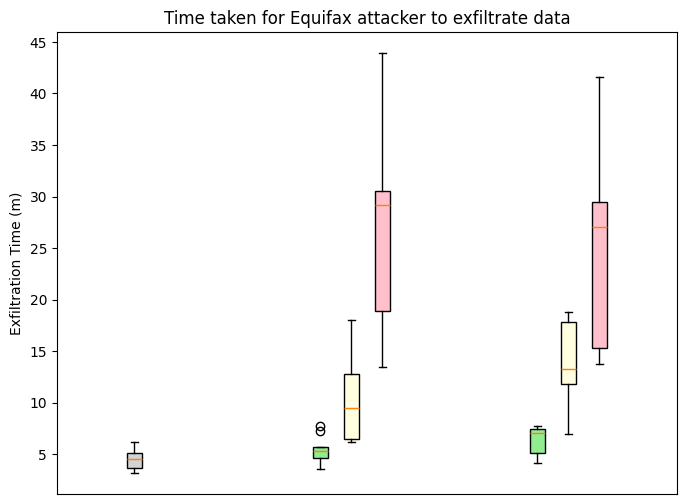

In [10]:
# Box plot comparing data exfiltration times
positions = [0, 1.2, 1.4, 1.6,
             2.6, 2.8, 3.0]

decoy_1_data = [d1_honeycred_1_times,
                d1_honeycred_5_times, 
                d1_honeycred_10_times]

decoy_2_data = [d2_honeycred_1_times,
                d2_honeycred_5_times, 
                d2_honeycred_10_times]

all_data = [baseline_exfiltration_times] + decoy_1_data + decoy_2_data

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, patch_artist=True, widths=0.1, positions=positions)

plt.xticks(positions, ['Baseline', '1', '5', '10', '1', '5', '10'])
plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('Exfiltration Time (m)')
plt.xlabel('')
plt.title('Time taken for Equifax attacker to exfiltrate data')


# fill with colors
colors = ['lightgrey', 'lightgreen', 'lightyellow', 'pink', 'lightgreen', 'lightyellow', 'pink']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

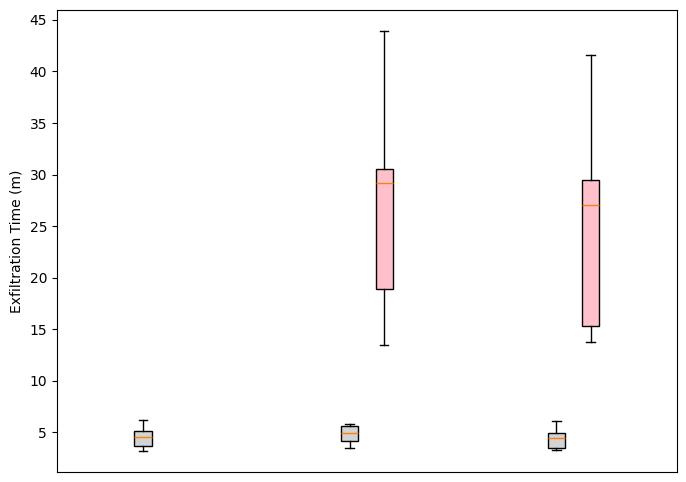

In [11]:
# Box plot comparing data exfiltration times
positions = [0, 1.2, 1.4,
             2.4, 2.6]

decoy_1_data = [d1_honeycred_0_times,
                d1_honeycred_10_times]

decoy_2_data = [d2_honeycred_0_times, 
                d2_honeycred_10_times]

all_data = [baseline_exfiltration_times] + decoy_1_data + decoy_2_data

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, patch_artist=True, widths=0.1, positions=positions)

plt.xticks(positions, ['Baseline', '0', '10', '0', '10'])
plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('Exfiltration Time (m)')
plt.xlabel('')
plt.title('')


# fill with colors
colors = ['lightgrey', 'lightgrey', 'pink', 'lightgrey', 'pink']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

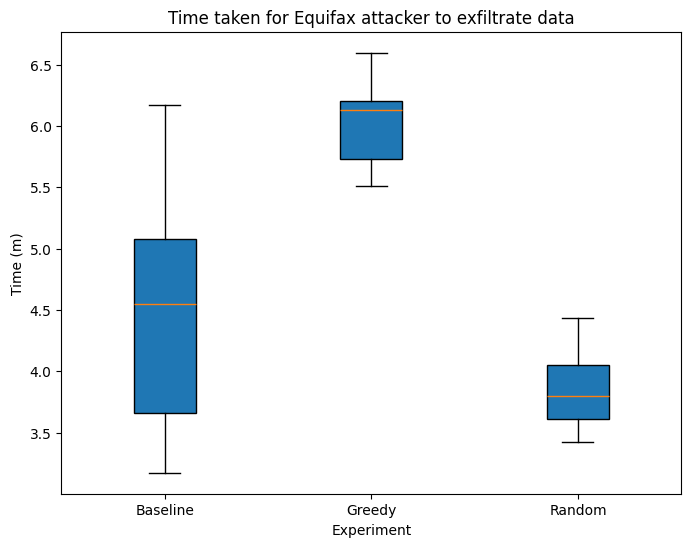

In [15]:
# Box and whisker plot of baseline vs greedy exfiltration times
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([baseline_exfiltration_times, greedy_baseline_exfiltration_times, random_baseline_exfiltration_times], patch_artist=True)

plt.xticks([1, 2, 3], ['Baseline', 'Greedy', 'Random'])

plt.ylabel('Time (m)')
plt.xlabel('Experiment')
plt.title('Time taken for Equifax attacker to exfiltrate data')

plt.show()
